In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset=pd.read_csv("C:\\Users\\surya\\Downloads\\data-set\\Position_Salaries.csv")

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X=dataset.iloc[:,1:2].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [9]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [13]:
X_test

array([[3],
       [9]], dtype=int64)

In [14]:
y_train

array([ 110000, 1000000,   50000,  200000,  300000,   80000,   45000,
        150000], dtype=int64)

In [15]:
y_test

array([ 60000, 500000], dtype=int64)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_x=StandardScaler()
sc_y=StandardScaler()

In [18]:
X=sc_x.fit_transform(X)

In [19]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [21]:
Y=sc_y.fit_transform(y.reshape(-1,1))

In [22]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [23]:
from sklearn.svm import SVR

In [25]:
reg=SVR(kernel='rbf')

In [26]:
reg.fit(X,Y)

C:\Users\surya\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [27]:
y_pred=reg.predict(sc_x.transform(np.array([[6.5]])))

In [28]:
y_pred

array([-0.27861589])

In [29]:
y_pred=sc_y.inverse_transform(y_pred.reshape(-1,1))

In [30]:
y_pred

array([[170370.0204065]])

Text(0.5, 1.0, 'Truth or Bluff')

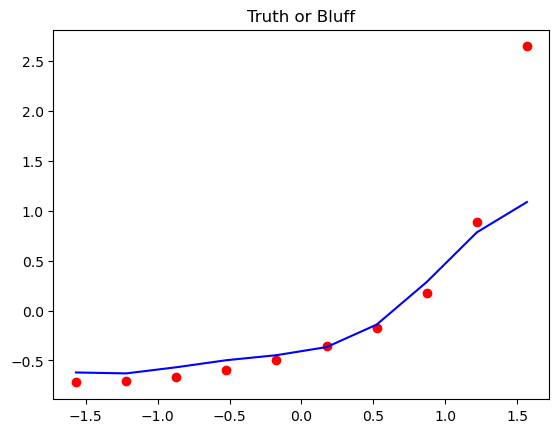

In [33]:
plt.scatter(X,Y,c='red')
plt.plot(X,reg.predict(X),c='blue')
plt.title("Truth or Bluff")
plt.xlabel("Pos")